## There are different types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Example 1: Binary classification

In [ ]:
# create data to view and fit
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
# A simple toy dataset to visualize clustering and classification algorithms.

from sklearn.datasets import make_circles

#make 1000 examples
n_samples = 1000

# create circles
X, y = make_circles(n_samples, noise = 0.03,random_state = 42)

In [ ]:
# check out features and labels
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


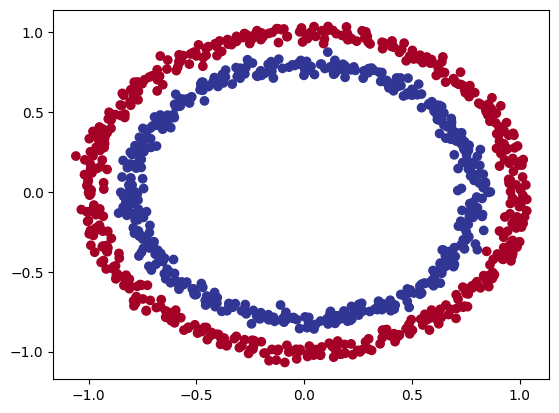

In [ ]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# check the shapes
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# spliting the data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Modeling
* classify inner (blue) or outer (red) circles, using 2 features


1, create or import the model

2, compile the model

3, fit the model

4, evaluate the model

5, tweak

6, evaluate...


In [ ]:
import tensorflow as tf
#set a random seed
tf.random.set_seed(42)

# create the model using the Sequencial API
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

#fit the model
model_1.fit(X_train,y_train, epochs = 5)


Epoch 1/5
25/25 [==============================] - 2s 6ms/step - loss: 2.1937 - accuracy: 0.4875
Epoch 2/5
25/25 [==============================] - 0s 16ms/step - loss: 0.7565 - accuracy: 0.4950
Epoch 3/5
25/25 [==============================] - 0s 17ms/step - loss: 0.7177 - accuracy: 0.4988
Epoch 4/5
25/25 [==============================] - 0s 18ms/step - loss: 0.7033 - accuracy: 0.5038
Epoch 5/5
25/25 [==============================] - 0s 14ms/step - loss: 0.6980 - accuracy: 0.4888


In [ ]:
#accuracy equal to random selection (0.5 in a binary classification)
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 6.6418 - accuracy: 0.4975
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 6.6262 - accuracy: 0.5013
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 6.4958 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 5.9109 - accuracy: 0.4700
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 5.4753 - accuracy: 0.5200
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 4.4320 - accuracy: 0.5263
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 6.9799 - accuracy: 0.4963
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
# adding one layer did not improve the accuracy significatly the value is close to random


In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics=['accuracy'])

# Fit the model
history = model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate our model
loss_3, accuracy_3 = model_3.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")


7/7 [==============================] - 0s 5ms/step - loss: 0.0081 - accuracy: 1.0000
Model loss on the test set: 0.008138374425470829
Model accuracy on the test set: 100.00%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


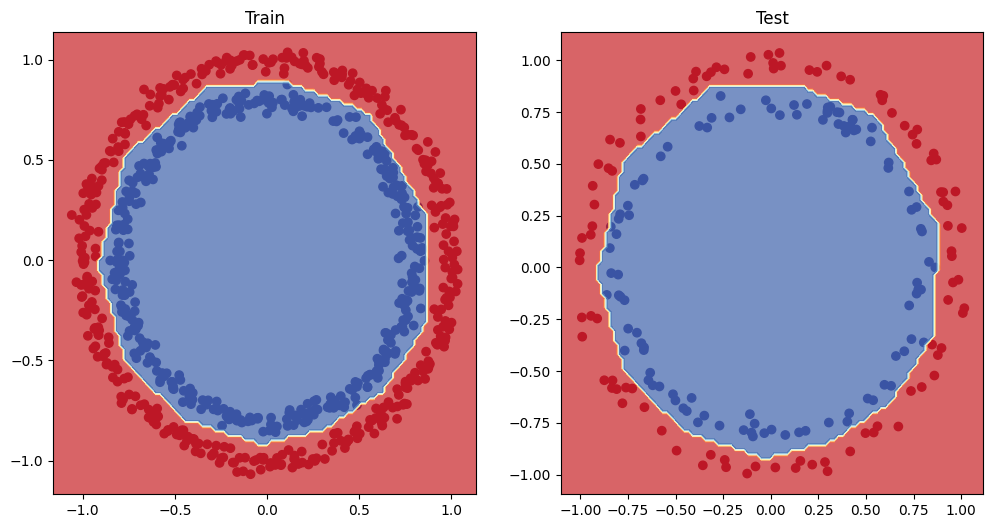

In [ ]:
# View the predictions of the model with relu and sigmoid activations
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)



# Plot the decision boundaries for the training and test set using model_3
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu);
plot_decision_boundary(model_3, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu);
plot_decision_boundary(model_3, X=X_test, y=y_test)
plt.show()

In [ ]:
#how did the model do as it was training (loss and accuracy progression)
pd.DataFrame(history.history)

,loss,accuracy
0,0.693318,0.48375
1,0.690010,0.51000
2,0.686146,0.52500
3,0.678628,0.56750
4,0.666785,0.54625
...,...,...
95,0.004149,1.00000
96,0.005492,1.00000
97,0.003749,1.00000
98,0.005790,0.99875


Text(0.5, 1.0, 'Model_3 training curves')

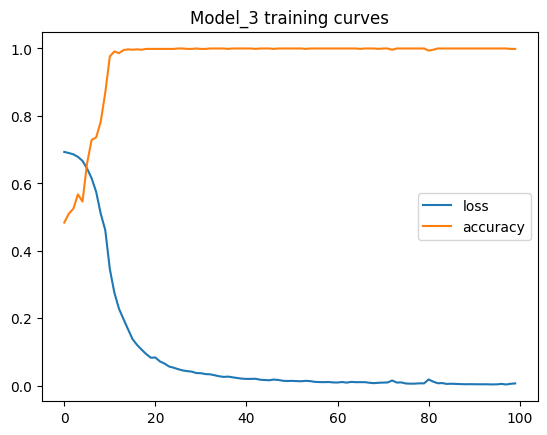

In [ ]:

# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_3 training curves")

In [ ]:
## Finding the best learning rate

# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch


# Fit the model
history = model_4.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5063 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5050 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5200 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5188 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5100 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5125 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

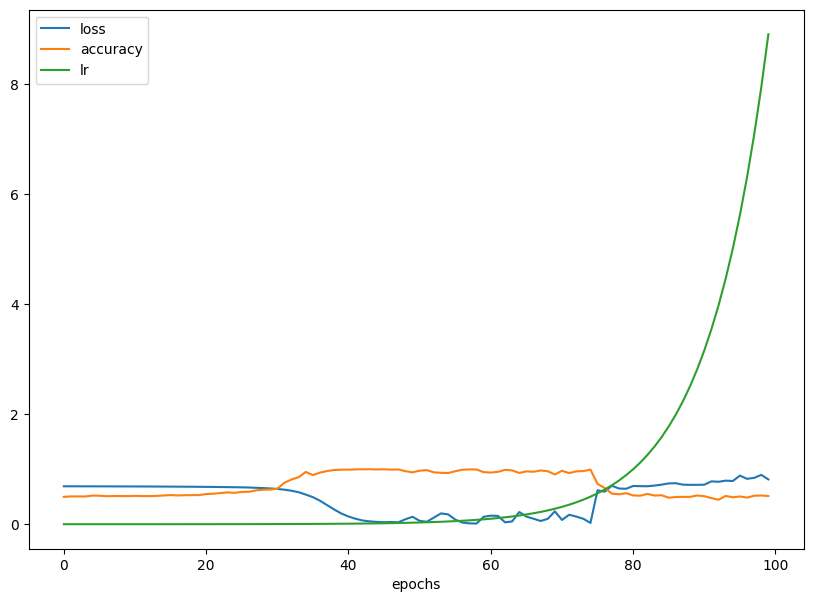

In [ ]:

# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

The learning rate exponentially increases as the number of epochs increases.

The model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, plot the loss versus the log-scale learning rate.

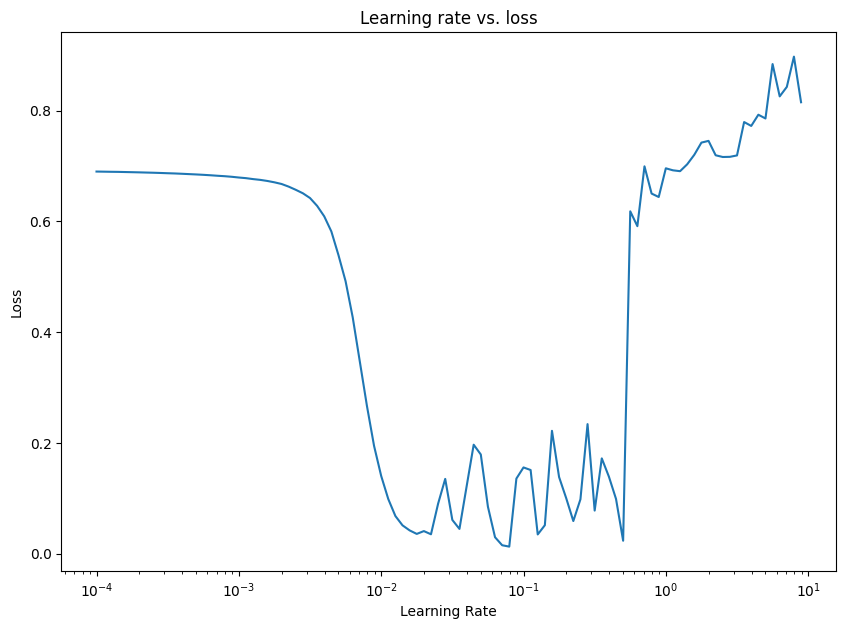

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

To figure out the ideal value of the learning rate (at least the ideal value to begin training our model),
take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between 0.01 and 0.02.

In [ ]:
# us a learning rate of 0.02 (model_3 had a learning rate of 0.01)

# Set random seed
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.02),
                metrics=['accuracy'])



# Fit the model
history = model_5.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 4ms/step - loss: 0.7041 - accuracy: 0.4700
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.5075
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.5500
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.6775
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.7525
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.8263
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.9712
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2174 - accuracy: 0.9887
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9937
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1174 - accuracy: 0.9987
Epoch 11/50
25/25 [

In [ ]:

# Evaluate model on the test dataset
loss_5, accuracy_5 = model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9850


313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


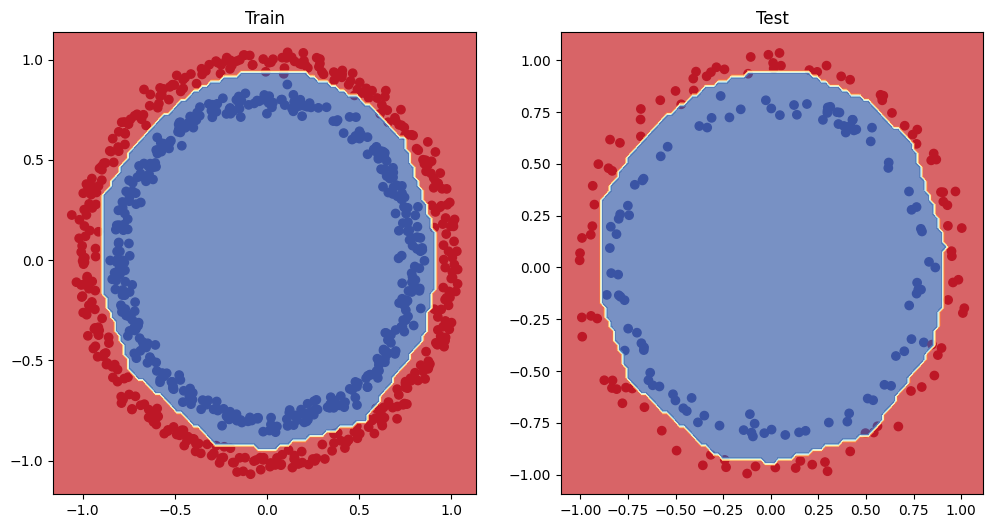

In [ ]:
# Plot the decision boundaries for the training and test set using model_3
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu);
plot_decision_boundary(model_5, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu);
plot_decision_boundary(model_5, X=X_test, y=y_test)
plt.show()

Text(0.5, 1.0, 'Model_3 training curves')

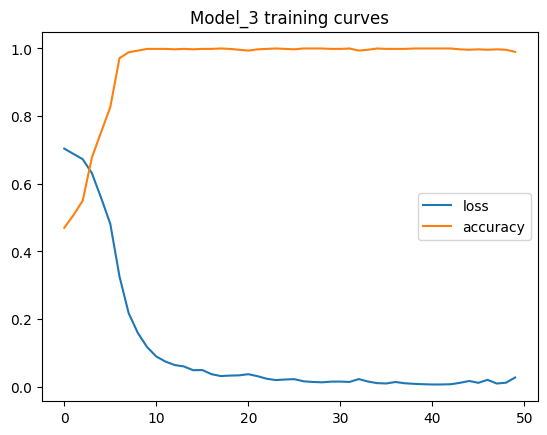

In [ ]:

# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_3 training curves")

In [ ]:
# model_3 and model_5 were very similar in terms of accuracy and loss

print(f"Model_3 loss on test set: {loss_3}")
print(f"Model_3 accuracy on test set: {(accuracy_3*100):.2f}%")
print(f"Model_5 loss on test set: {loss_5}")
print(f"Model_5 accuracy on test set: {(accuracy_5*100):.2f}%")

Model_3 loss on test set: 0.008138374425470829
Model_3 accuracy on test set: 100.00%
Model_5 loss on test set: 0.04141945764422417
Model_5 accuracy on test set: 98.50%


In [ ]:
# Model 5 has worst metrics. Other metrics could have been calculated (precision, recall and F1-score) but will move to another example



## Example 2: Multiclass classification

In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# fashion_mnist dataset
# This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
# along with a test set of 10,000 images.


# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

# The data is already splitted in to training and test datasets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:

# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

* Input shape = 28 x 28 (the shape of one image)
* Outpout shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid as for the binary class problems)
                       


In [ ]:
# Reshape the training and test examples
train_x_flatten = train_data.reshape(train_data.shape[0], -1)   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_data.reshape(test_data.shape[0], -1)

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (60000, 784)
test_x's shape: (10000, 784)


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # If the targets are on-hot enconded use categorical_crossentropy, if targets are integer use sparse_categorical_crossentropy
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_6.fit(train_x,
                            train_labels,
                            epochs=10,
                            validation_data=(test_x, test_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1500 - accuracy: 0.5979 - val_loss: 0.8036 - val_accuracy: 0.7207
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7128 - accuracy: 0.7503 - val_loss: 0.7209 - val_accuracy: 0.7447
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6574 - accuracy: 0.7654 - val_loss: 0.6762 - val_accuracy: 0.7616
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6359 - accuracy: 0.7746 - val_loss: 0.6527 - val_accuracy: 0.7700
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6221 - accuracy: 0.7796 - val_loss: 0.6439 - val_accuracy: 0.7709
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6097 - accuracy: 0.7847 - val_loss: 0.6596 - val_accuracy: 0.7700
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6007 - accuracy: 0.7878 - val_loss: 0.6615 - val_accuracy:

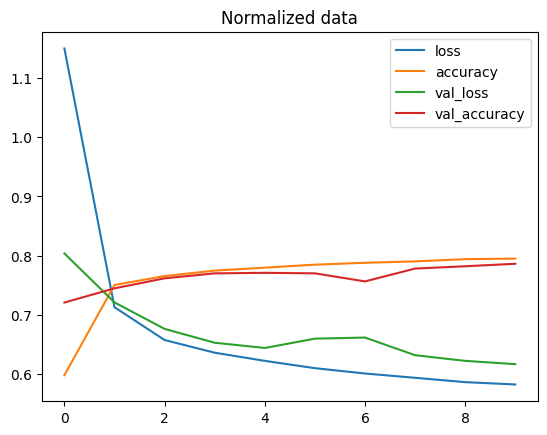

In [ ]:

import pandas as pd
# Plot data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [ ]:
## chaninng the architecture
# Set random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dropout(rate = 0.2),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dropout(rate = 0.2),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


# Fit the model
model_7_history = model_7.fit(train_x,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_x, test_labels))


Epoch 1/40
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5074 - accuracy: 0.8158 - val_loss: 0.4120 - val_accuracy: 0.8495
Epoch 2/40
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3932 - accuracy: 0.8566 - val_loss: 0.4267 - val_accuracy: 0.8467
Epoch 3/40
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3649 - accuracy: 0.8677 - val_loss: 0.3855 - val_accuracy: 0.8603
Epoch 4/40
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3428 - accuracy: 0.8739 - val_loss: 0.3639 - val_accuracy: 0.8677
Epoch 5/40
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3264 - accuracy: 0.8794 - val_loss: 0.3581 - val_accuracy: 0.8662
Epoch 6/40
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3161 - accuracy: 0.8821 - val_loss: 0.3756 - val_accuracy: 0.8568
Epoch 7/40
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3069 - accuracy: 0.8865 - val_loss: 0.3567 -

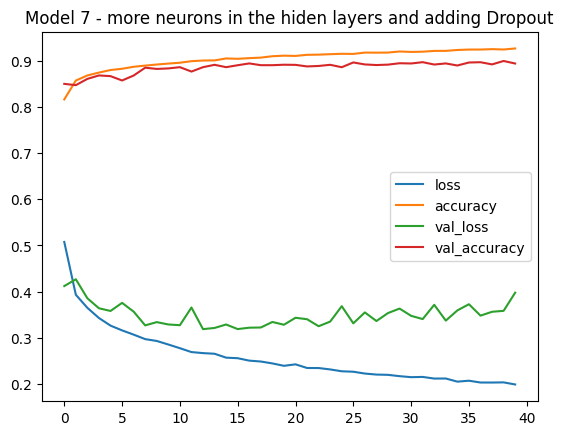

In [ ]:
# Plot data loss curves
pd.DataFrame(model_7_history.history).plot(title="Model 7 - more neurons in the hiden layers and adding Dropout");


In [ ]:

# Make predictions with the most recent model
y_probs = model_7.predict(test_x) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 2s 7ms/step


array([[1.08670694e-16, 3.14261202e-21, 4.58754527e-16, 3.08453197e-22,
        1.67011488e-17, 1.81784817e-05, 1.50187031e-15, 4.01750067e-03,
        6.85293565e-14, 9.95964289e-01],
       [1.79206279e-06, 4.00972861e-15, 9.99563515e-01, 3.50426509e-15,
        3.17141792e-04, 2.22996083e-32, 1.17445794e-04, 0.00000000e+00,
        6.09245659e-14, 0.00000000e+00],
       [3.94177463e-31, 9.99999940e-01, 4.64056421e-37, 9.81287848e-29,
        4.73714707e-30, 0.00000000e+00, 4.80671340e-25, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.75070596e-32, 9.99999940e-01, 8.65557174e-37, 1.72158924e-21,
        4.01251095e-27, 0.00000000e+00, 1.91095344e-22, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [7.28807077e-02, 3.83315490e-10, 2.34666653e-03, 1.33520689e-05,
        3.31064482e-04, 3.61483676e-10, 9.24408376e-01, 1.07374691e-11,
        1.98248454e-05, 7.77045962e-12]], dtype=float32)

In [ ]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]


(9, 'Ankle boot')

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:

# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[886,   1,  15,  21,   4,   1,  66,   0,   6,   0],
       [  1, 974,   1,  14,   5,   0,   4,   0,   1,   0],
       [ 14,   1, 854,  10,  73,   0,  48,   0,   0,   0],
       [ 23,   1,  12, 914,  26,   0,  20,   0,   4,   0],
       [  1,   0, 100,  32, 818,   0,  47,   0,   2,   0],
       [  0,   0,   0,   0,   0, 978,   0,  15,   0,   7],
       [162,   0, 107,  21,  75,   0, 628,   0,   7,   0],
       [  0,   0,   0,   0,   0,  17,   0, 971,   0,  12],
       [  5,   2,   4,   4,   4,   1,   4,   5, 971,   0],
       [  1,   0,   0,   0,   0,   8,   0,  50,   0, 941]])

In [ ]:
# for a better visualization
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


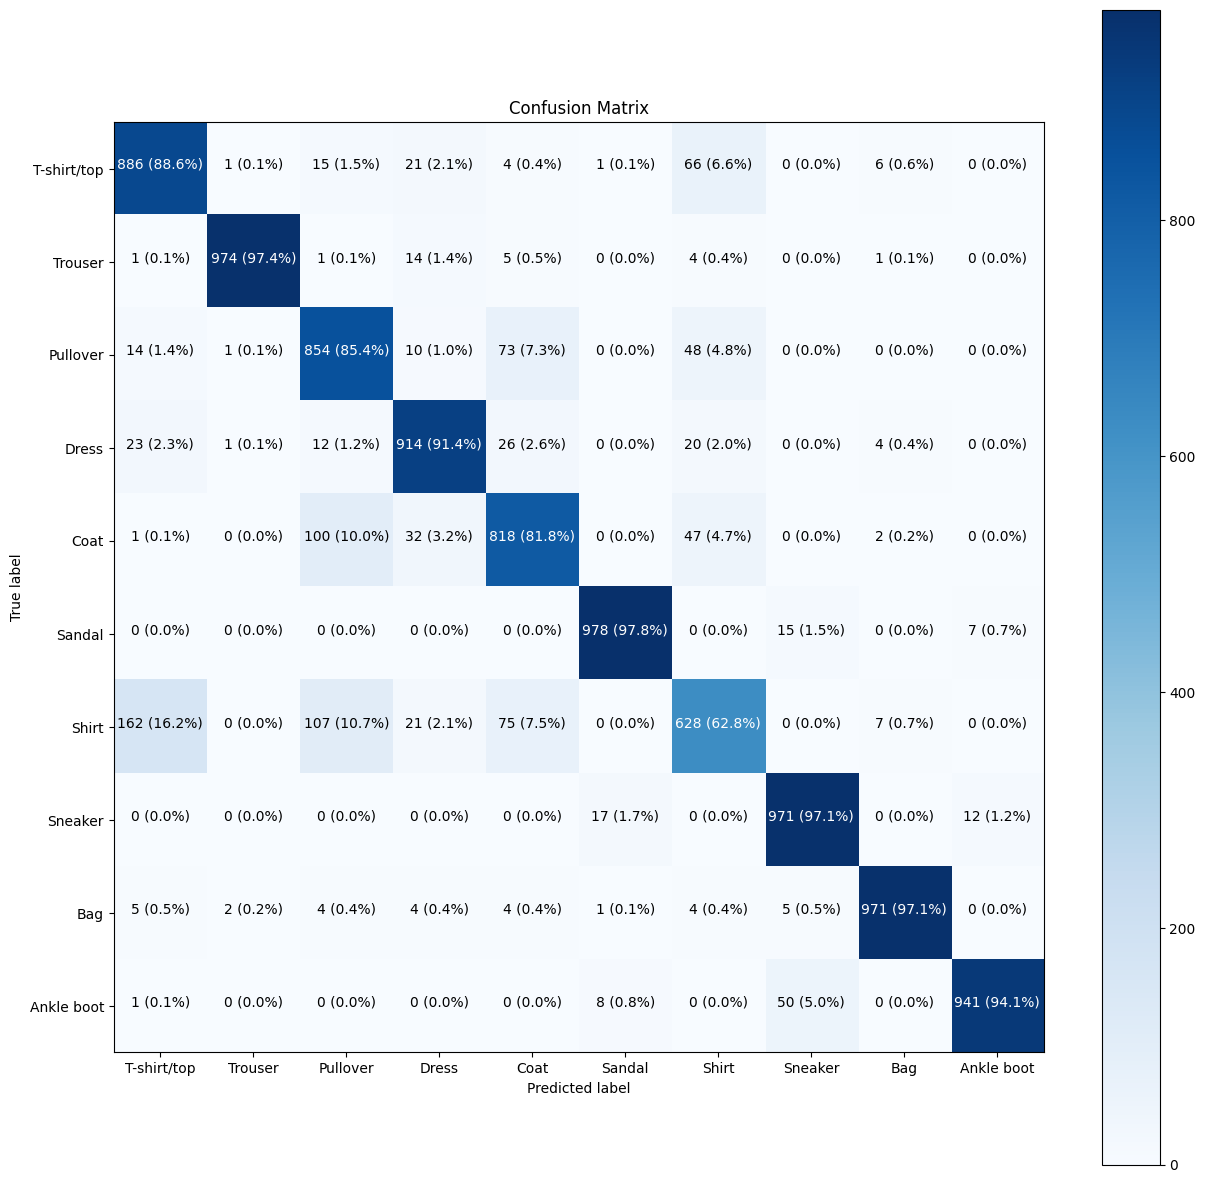

In [ ]:

# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
model_7.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_24 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


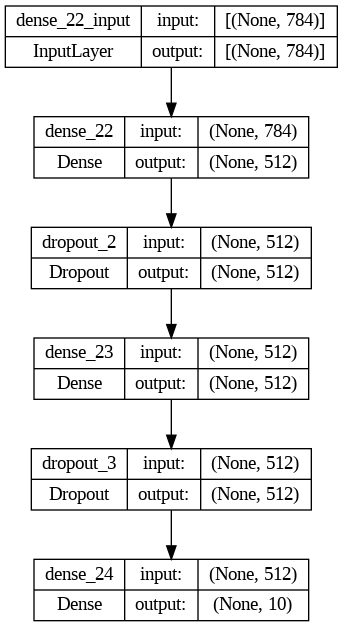

In [ ]:

from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_7, show_shapes=True)